In [1]:
import matplotlib.pyplot as plt
import numpy as np
from mpl_toolkits.mplot3d import Axes3D
import imageio.v2 as imageio
import tempfile
import IPython.display as display
from io import BytesIO
import os
import time
from utils import squared_loss_function, absolute_loss_function, activation_function_linear
from utils import computation_graph_linear, create_computation_graph_linear

$$
\require{cancel}
$$

# Linear Regresion

This document shows theory behind linear regresion. It pretends to be an incremental document where I will be uploading different information on demand.

Many people like seeing Linear Regression as a special model in itself. I like to avoid this categorization. For me linear regresion is no more than a specific type of neural network that, due to its construction, allow us to derive many theoretical results which are not possible for other models.

We can talk about four types of linear regresion models:

* $f: \mathbb{R} \rightarrow \mathbb{R}$
* $f: \mathbb{R}^N \rightarrow \mathbb{R}$
* $f: \mathbb{R} \rightarrow \mathbb{R}^M$
* $f: \mathbb{R}^N \rightarrow \mathbb{R}^M$


## One dimensional linear regresion : $f: \mathbb{R} \rightarrow \mathbb{R}$

One dimensional linear regresion stands for problems where for an input $x\in \mathbb{R}$ we want to predict and output $t\in \mathbb{R}$, assuming some form of noise model. This, however, will be covered in an advanced section, named a probabilistic perspective of linear regresion.

The idea is to predict $t$ assuming that there is a linear relation between the inputs $x$. So mathematically we want to model:

$$
t = w \cdot x + b
$$

with $w \in \mathbb{R}, b\in \mathbb{R}$.

The goal in linear regresion is to find the linear model that better represents some given data. In other words, it is a search problem where we want to find the values of $w,b$  that better represents some given data.

Let's assume we have three different points $\{(x_n,t_n\}^3_{n=1}$ representing $x$ altura and $t$ peso. So our goal is to find a linear relationship between the altura and peso of some people. Assume we have these values:

\begin{split}
(x_1,t_1) &= (0,0.2)\\
(x_2,t_2) &= (1,0.5)\\
(x_3,t_3) &= (2,2.8)\\
\end{split}

Lets  plot these values:

/tmp/ipykernel_405124/4110419435.py:9: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x_data[i], t_data[i] + 0.1, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")  # Etiqueta sobre el punto


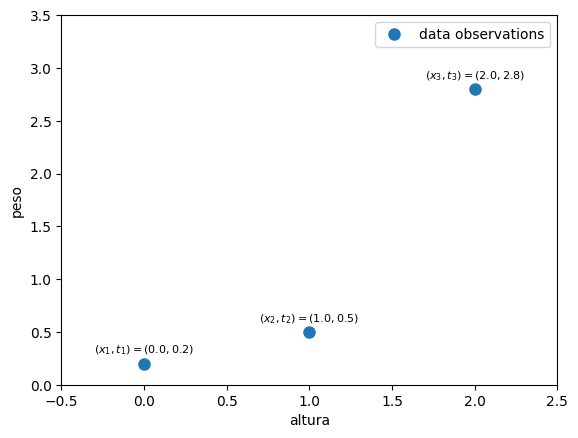

In [2]:
# input to our model. Represents time in seconds
x_data = np.array([0,1,2]).reshape(3,1)
# outputs associated to each input. Represents cantidad de lluvia in mm^3
t_data = np.array([0.2,0.5,2.8]).reshape(3,1)

## display
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] + 0.1, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")  # Etiqueta sobre el punto
plt.xlabel('altura')
plt.ylabel('peso')
plt.ylim([0,3.5])
plt.xlim([-0.5,2.5])
plt.legend()

There are many possible linear models that can explain this data. In particular there are $\infty$ possible values for $w$ and $b$. Let's plot 3 possible linear models.


/tmp/ipykernel_405124/3872234043.py:14: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x_data[i], t_data[i] + 0.1, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")  # Etiqueta sobre el punto


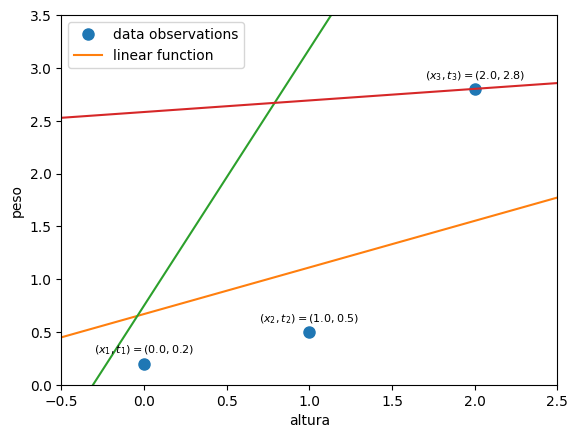

In [3]:
## ======================================================================= ##
## display possible functions depending on different values of $w$ and $b$ ##
## ======================================================================= ##

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] + 0.1, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")  # Etiqueta sobre el punto
plt.xlabel('altura')
plt.ylabel('peso')
plt.ylim([0,3.5])
plt.xlim([-0.5,2.5])


## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(3):

    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,4, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    if i == 0:
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'linear function' )
    else:
        plt.plot(x_range,y_range, color = f"C{i+1}")

plt.legend(loc = 'upper left')

The question now is what do we understand by optimal parameters $w,b$ representing our data?. Obviously, if the relationship between $x$ and $t$ is totally linear, then the line that goes through all the points is the best possible representation.

However, if the data does not have a perfect linear relationship, as in our example, then there is no line that can go through these points. Here, is where the concept of loss function comes into place.

First of all note that for different possible model (orange, red and green lines), we will have different predictions, for each of our datapoints. We label predictions using $y$. So $t$ is our target and $y$ is the prediction of the model.

For the first candidate linear model $a$ with parameters $w_a, b_a$. The predictions for each of our three points are: 

\begin{split}
y_1 &= w_a \cdot x_1 + b_a \\
y_2 &= w_a \cdot x_2 + b_a \\
y_3 &= w_a \cdot x_3 + b_a \\
\end{split}

Similarly for the other two candidates $b$ and $c$ we have:

\begin{split}
y_1 = w_b \cdot x_1 + b_b \\
y_2 = w_b \cdot x_2 + b_b \\
y_3 = w_b \cdot x_3 + b_b \\
\end{split}

\begin{split}
y_1 = w_c \cdot x_1 + b_c\\
y_2 = w_c \cdot x_2 + b_c \\
y_3 = w_c \cdot x_3 + b_c \\
\end{split}

Let's plot these predictions alongside the lines:

/tmp/ipykernel_405124/1361629233.py:10: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x_data[i], t_data[i] - 0.25, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")
/tmp/ipykernel_405124/1361629233.py:34: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  plt.text(x_data[j], y_pred[j] - 0.25, f"$(x_{j+1},y_{j+1})=({float(x_data[j])},{float(y_pred[j]):.2})$", fontsize=8, ha="center", color = f"C{i+1}")
/tmp/ipykernel_405124/1361629233.py:40: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your ar

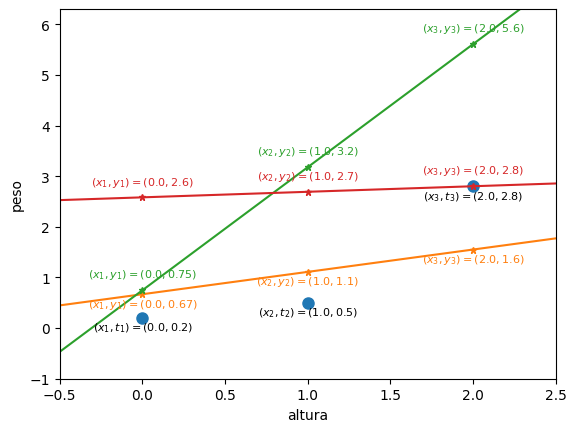

In [4]:
## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
plt.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
for i in range(len(x_data)):
    plt.text(x_data[i], t_data[i] - 0.25, f"$(x_{i+1},t_{i+1})=({float(x_data[i])},{float(t_data[i])})$", fontsize=8, ha="center")  
plt.xlabel('altura')
plt.ylabel('peso')
plt.ylim([-1,6.3])
plt.xlim([-0.5,2.5])

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i in range(3):

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    if i == 0:
        plt.plot(x_data, y_pred,'*', markersize = 5, color = f"C{i+1}", label = 'Predictions at training input data')
        plt.plot(x_range,y_range, color = f"C{i+1}", label = 'function on all the domain' )
        
        for j in range(len(x_data)):
            plt.text(x_data[j], y_pred[j] - 0.25, f"$(x_{j+1},y_{j+1})=({float(x_data[j])},{float(y_pred[j]):.2})$", fontsize=8, ha="center", color = f"C{i+1}") 
    else:
        plt.plot(x_data, y_pred,'*', markersize = 5,  color = f"C{i+1}")
        plt.plot(x_range,y_range, color = f"C{i+1}")
        
        for j in range(len(x_data)):
            plt.text(x_data[j], y_pred[j] + 0.25, f"$(x_{j+1},y_{j+1})=({float(x_data[j])},{float(y_pred[j]):.2})$", fontsize=8, ha="center", color = f"C{i+1}") 



As we see from the plot, the prediction made by the red line on the third point $(x_3,t_3)$ is perfect. However it does not go near the points $(x_1,t_1)$ and $(x_2,t_2)$. For these two points, the orange line is a better candidate.   

If you look at the picture, which line would you choose to use?. Intuitively, we will be tempted to select the line that is the closest possible to all the points. So we want a line that is the best possible explanation on average to all the points. So in this example, although the red line is a good candidate for the third point, we will be tempted to select the orange line because it better represent the three points.

Next, we should ask ourselves, what do we understand from the "closest" possible line?. We need to transform this into a mathematical expression because machine learning is about math. It turns out that there are many ways to define closenes in mathematical spaces. Actually, the way we define closeness induces different mathematical spaces. For this, we need to introduce the concept of distances. If we are able to measure the distance between $t$ and $y$, we can select the line that has the closest possible distances.

In mathematics a distance $d : \mathbb{R}^N \times \mathbb{R}^N \rightarrow \mathbb{R}$ is a function that satisfies:

\begin{split}
d(x,x) = 0 \\
d(x,y) > 0, \, x\neq y \\
d(y,x) = d(x,y) \\
d(x,z) \leq d(x,y) + d(x,z)
\end{split}


We are going to use two different distances, the square of the Euclidean distance and the manhatan distance. The reason why we used the square of the Euclidean distance and not the standard distance is given in the advanced section, which covers the probabilistic perspective. However, I will show here that any constant modification to a loss function does not change the result of the optimization process.

* Square Euclidean distance: $ d(a,b) = (a-b)^2$
* Manhatan distance: $ d(a,b) = |a-b|$

As we can see the manhatan distance measures the absolute value of the difference between two points.

Thus, we can now measure the distance between the model's predictions $y$ and the desired targets $t$ on each of our training points, and for each of our models. Let's look at it:


/tmp/ipykernel_405124/4175413790.py:47: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax1.text(x_data[j], y_pred[j] - 0.25, f"$d(y_{j+1},t_{j+1})={float(squared_loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}")
/tmp/ipykernel_405124/4175413790.py:55: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax2.text(x_data[j], y_pred[j] - 0.25, f"$d(y_{j+1},t_{j+1})={float(absolute_loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}")
/tmp/ipykernel_405124/4175413790.py:64: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array b

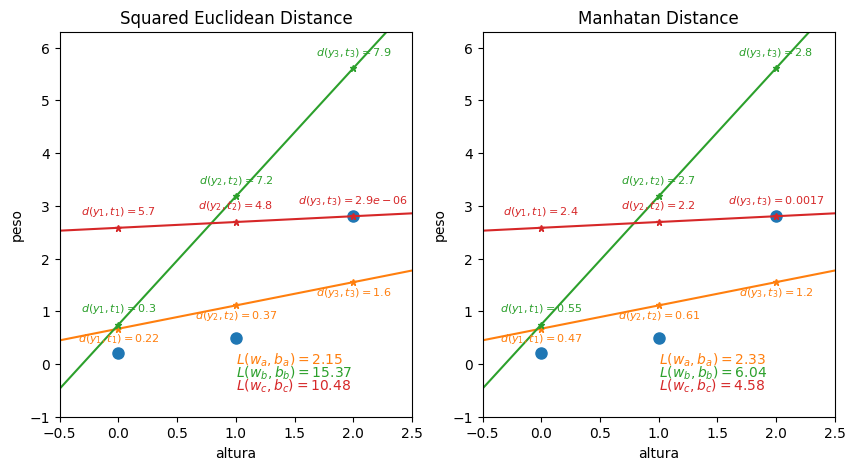

In [5]:
## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## display data again
fig, (ax1,ax2) = plt.subplots(1,2, figsize=(10,5))

ax1.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
ax2.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')

ax1.set_xlabel('altura')
ax1.set_ylabel('peso')
ax1.set_title('Squared Euclidean Distance')
ax1.set_ylim([-1,6.3])
ax1.set_xlim([-0.5,2.5])

ax2.set_xlabel('altura')
ax2.set_ylabel('peso')
ax2.set_title('Manhatan Distance')
ax2.set_ylim([-1,6.3])
ax2.set_xlim([-0.5,2.5])

## ================================================================================
## Create several possible functions that our specific neural network can implement
for i, model_id in zip(range(3),['a','b','c']):

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    squared_loss = squared_loss_function(t_data, y_pred)
    absolute_loss = absolute_loss_function(t_data, y_pred)
    

    if i == 0:
        ax1.plot(x_data, y_pred,'*', markersize = 5, color = f"C{i+1}", label = 'Predictions at training input data')
        ax1.plot(x_range,y_range, color = f"C{i+1}", label = 'function on all the domain' )
        
        for j in range(len(x_data)):
            ax1.text(x_data[j], y_pred[j] - 0.25, f"$d(y_{j+1},t_{j+1})={float(squared_loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}") 
            
        ax1.text(1,-0.25*i, f"$L(w_{model_id},b_{model_id}) = {float(np.sum(squared_loss)):.2f}$", color = f"C{i+1}")    
            
        ax2.plot(x_data, y_pred,'*', markersize = 5, color = f"C{i+1}", label = 'Predictions at training input data')
        ax2.plot(x_range,y_range, color = f"C{i+1}", label = 'function on all the domain' )
        
        for j in range(len(x_data)):
            ax2.text(x_data[j], y_pred[j] - 0.25, f"$d(y_{j+1},t_{j+1})={float(absolute_loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}") 
            
        ax2.text(1,-0.25*i, f"$L(w_{model_id},b_{model_id}) = {float(np.sum(absolute_loss)):.2f}$", color = f"C{i+1}")    
        
    else:
        ax1.plot(x_data, y_pred,'*', markersize = 5,  color = f"C{i+1}")
        ax1.plot(x_range,y_range, color = f"C{i+1}")
        
        for j in range(len(x_data)):
            ax1.text(x_data[j], y_pred[j] + 0.25, f"$d(y_{j+1},t_{j+1})={float(squared_loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}")
            
        ax1.text(1,-0.25*i, f"$L(w_{model_id},b_{model_id}) = {float(np.sum(squared_loss)):.2f}$", color = f"C{i+1}")    
        

        ax2.plot(x_data, y_pred,'*', markersize = 5,  color = f"C{i+1}")
        ax2.plot(x_range,y_range, color = f"C{i+1}")
        
        for j in range(len(x_data)):
            ax2.text(x_data[j], y_pred[j] + 0.25, f"$d(y_{j+1},t_{j+1})={float(absolute_loss[j]):.2}$", fontsize=8, ha="center", color = f"C{i+1}")
            
 
        ax2.text(1,-0.25*i, f"$L(w_{model_id},b_{model_id}) = {float(np.sum(absolute_loss)):.2f}$", color = f"C{i+1}") 

We can now observe what we have intuitively reasoned. The first thing is that the red line, on the third point, has the lowest distance, being closed to $0$ in case of the squared euclidean distance. However, the loss on the rest of the points is higher than when compared to the orange line.

Actually, the notion of *orange line* being a better representation of the points can be seen, mathematically, by the expected distances. In other words, by summing the distance of each point. This distances, in machine learning, are called losses, and the sum of individual losses is called the expected loss. In other words:

\begin{split}
L(w_a,b_a) = d(y_1(w_a,b_a), t_1) + d(y_2(w_a,b_a), t_2) + d(y_3(w_a,b_a), t_3) \\
L(w_b,b_b) = d(y_1(w_b,b_b), t_1) + d(y_2(w_b,b_b), t_2) + d(y_3(w_b,b_b), t_3) \\
L(w_c,b_c) = d(y_1(w_c,b_c), t_1) + d(y_2(w_c,b_c), t_2) + d(y_3(w_c,b_c), t_3) \\
\end{split}

where, since $y$ are functions of the parameters, I am using the notation $y(w_a,b_a,x)$ to the note the linear function, since $y_1(w_a,b_a,x) = w_a\cdot x_1 + b_a $. 

In our example we have (for the Squared Euclidean loss):

\begin{split}
L(w_a,b_a) = 0.22 + 0.37 + 1.6 = 2.15\\
L(w_b,b_b) = 5.7 + 4.8 + 2.9e^{-6} = 10.48\\
L(w_c,b_c) = 0.3 + 7.2 + 7.9 = 15.37\\
\end{split}

which are also displayed in the figure, in addition to the absolute loss, obtained from the manhatan distance. We see that the overall loss function is lower for the orange line, then red line, and the worst possible representaiton is the green line. Eventhough the absolute and squared losses are different for each of the models, both losses provide the same order of who is the best and worst model.

We can generalize the concepts seen so far, for any arbitrary number of data points $N$. Now we have a dataset $(x_n,t_n)^N_{n=1}$. For a given parameter $w$, the two loss functions we have seen so far are given by:

\begin{split}
L_\text{squared}(w,b) = \sum_{n=1}^N (t_n - y_n)^2 \\
L_\text{absolute}(w,b) = \sum_{n=1}^N \left|t_n - y_n\right| \\
\end{split}

where $y_n = w \cdot x_n + b$. As we mentioned earlier, different parameters will imply a different loss function value. So loss functions can be seen as functions of the parameters. In our example above we showed the loss function corresponding to three lines. However, we can analize the loss function value for any parameter, and display plot it. 

To make the reader familiar, lets look at the loss function varying the weight parameter, fixing the bias parameter to the value of $0.5$. In other words we show:

\begin{split}
L_\text{squared}(w,b = 0.5) = \sum_{n=1}^N (t_n - y_n)^2 \\
L_\text{absolute}(w,b = 0.5) = \sum_{n=1}^N \left|t_n - y_n\right| \\
\end{split}

where now: $y_n = w \cdot x_n + 0.5$.

In [6]:
## ============================================================================== ##
## display loss as a function of weight parameter (loss incurred by each network) ##
## ============================================================================== ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight parameter. To do so we fix the bias to 0.
## We show two different losses: squared (top) and absolute ( bottom )
## I repeat code from above but computing and plotting the loss.

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## create figure box
fig, ((ax11,ax12),(ax21,ax22)) = plt.subplots(2,2, figsize = (10,10))


## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1
# bias fixed value to plot only depending on w
fix_bias = 0

## ================================================================================
## Create several possible functions that our specific neural network can implement

# to save individual losses, expected losses and parameters used
squared_loss_acc = []
absolute_loss_acc = []
expected_squared_loss_acc = []
expected_absolute_loss_acc = []
w_acc = []
w_range = []
# Compute the loss funciton over 100 possible neural net.
for i in range(100):
    
    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,4, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w, b = fix_bias)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w, b = fix_bias)

    # compute the two losses at the predictions
    squared_loss = squared_loss_function(t_data, y_pred)
    absolute_loss = absolute_loss_function(t_data, y_pred)

    # acumulate loss and parameter used
    squared_loss_acc.append(squared_loss)
    absolute_loss_acc.append(absolute_loss)
    expected_squared_loss_acc.append(np.sum(squared_loss))
    expected_absolute_loss_acc.append(np.sum(absolute_loss))
    w_range.append(np.squeeze(w))
    w_acc.append(w)

    
# sort loss and weights to interactive plot later
idx = np.argsort(w_range)
sorted_expected_squared_loss_acc = np.array(expected_squared_loss_acc)[idx]
sorted_expected_absolute_loss_acc = np.array(expected_absolute_loss_acc)[idx]

## Display different models sequentially, alongside its loss.

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")


# variables to keep track of old weight losses display to show the overall loss function.
w_old = []
expected_squared_loss_old = []
expected_absolute_loss_old = []
for i,w in zip(range(100),w_acc):  
    
    ## repeat the projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w, b = fix_bias)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w, b = fix_bias)
    
    ## for subsequent plotting
    w = np.squeeze(w)
    
    ## clean up points     
    ax11.cla()
    ax12.cla()
    ax21.cla()
    ax22.cla()

    ## display data 
    ax11.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
    ax21.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')

    ax11.set_xlabel('altura')
    ax11.set_ylabel('peso')
    ax11.set_title('Squared Euclidean Distance')
    ax11.set_ylim([-1,6.3])
    ax11.set_xlim([-0.5,2.5])

    ax21.set_xlabel('altura')
    ax21.set_ylabel('peso')
    ax21.set_title('Manhatan Distance')
    ax21.set_ylim([-1,6.3])
    ax21.set_xlim([-0.5,2.5])
    
    ## display loss functions
    ax12.plot(np.array(w_range)[idx], sorted_expected_squared_loss_acc )
    ax12.set_xlabel('weight values')
    ax12.set_ylabel('squared loss function')

    ax22.plot(np.array(w_range)[idx], sorted_expected_absolute_loss_acc )
    ax22.set_xlabel('weight values')
    ax22.set_ylabel('absolute loss function')

    ## Plot function
    ax11.plot(x_data, y_pred,'*', markersize = 5, color = f"C1", label = 'Predictions at training input data')
    ax11.plot(x_range,y_range, color = f"C1", label = 'function on all the domain' )

    ax21.plot(x_data, y_pred,'*', markersize = 5, color = f"C1", label = 'Predictions at training input data')
    ax21.plot(x_range,y_range, color = f"C1", label = 'function on all the domain' )

    ## Plot individual losses
    for j in range(len(x_data)):
        ax11.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(squared_loss_acc[i][j]):.2}$", fontsize=8, ha="center", color = f"C1") 
    
    for j in range(len(x_data)):
        ax21.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(absolute_loss_acc[i][j]):.2}$", fontsize=8, ha="center", color = f"C1") 

    ## Plot expected loss
    ax11.text(0,5, f"$L(w = {w:.2f},b = {fix_bias}) = {expected_squared_loss_acc[i]:.2f}$", color = f"C1")  
    ax11.text(0,4.5, f"$y = {w:.2f} \cdot x + {fix_bias}$", color = f"k")  
    
    ax21.text(0,5, f"$L(w = {w:.2f},b = {fix_bias}) = {expected_absolute_loss_acc[i]:.2f}$", color = f"C1")    
    ax21.text(0,4.5, f"$y = {w:.2f} \cdot x + {fix_bias}$", color = f"k")  

    ## Plot already displayed losses
    ax12.plot(w_old, expected_squared_loss_old, '*', color = 'C0')
    ax22.plot(w_old, expected_absolute_loss_old, '*', color = 'C0')
   
    ## Plot the loss in the loss function view
    ax12.plot(w, expected_squared_loss_acc[i], '*', color = f"C1")
    ax22.plot(w, expected_absolute_loss_acc[i], '*',  color = f"C1")

    ax12.text(w,expected_squared_loss_acc[i]+2.5, f"$L(w = {w:.2f},b = {fix_bias}) = {expected_squared_loss_acc[i]:.2f}$", color = f"C1")    
    ax22.text(w,expected_absolute_loss_acc[i]+0.5, f"$L(w = {w:.2f},b = {fix_bias}) = {expected_absolute_loss_acc[i]:.2f}$", color = f"C1")    

    # save old to display in next figure
    w_old.append(w)
    expected_squared_loss_old.append(expected_squared_loss_acc[i])
    expected_absolute_loss_old.append(expected_absolute_loss_acc[i])
      
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    ## save images for later display
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()


/tmp/ipykernel_405124/498105182.py:136: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax11.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(squared_loss_acc[i][j]):.2}$", fontsize=8, ha="center", color = f"C1")
/tmp/ipykernel_405124/498105182.py:139: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax21.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(absolute_loss_acc[i][j]):.2}$", fontsize=8, ha="center", color = f"C1")
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your i

In [7]:
# Mostrar el video en Jupyter Notebook
display.display(display.Video(data=video_filename, embed=True))
os.remove(video_filename)

Now that we have familiarize with the concept of loss function and how it looks like, we need to note that for this problem we really have two parameters: $w$ and $b$, and so the loss function is a function that must be displayed in a 3 dimensional plot. 

In other words we will plot now the loss function 

\begin{split}
L_\text{squared}(w,b ) = \sum_{n=1}^N (t_n - y_n)^2 \\
L_\text{absolute}(w,b) = \sum_{n=1}^N \left|t_n - y_n\right| \\
\end{split}

with: $y = w\cdot x + b$, varying both bias and weight parameter.


In [8]:
## ======================================================================================= ##
## display loss as a function of weight and bias parameter (loss incurred by each network) ##
## ======================================================================================= ##
## Let's see the associated loss to each possible function but seeing the loss
## as a function of the weight and bias parameter. 
## We show two different losses: squared (top) and absolute ( bottom )

## fix seed so that randomness is controlled.
np.random.seed(5)

## number of points in the domain used to plot the functions 
N_points_domain = 100

## create figure box
fig = plt.figure(figsize = (10,10))
ax11 = fig.add_subplot(221)
ax12 = fig.add_subplot(222, projection='3d')
ax21 = fig.add_subplot(223)
ax22 = fig.add_subplot(224, projection='3d')

## ===========================================
## Neural network specification for each layer

# neurons of input layer
n_in = 1
# neurons of output layer
n_out = 1

## ================================================================================
## Create several possible functions that our specific neural network can implement

## To do so we need a mesh
w_mesh, b_mesh = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))

# reshape x_data and t_data for computations
x_data_expanded = x_data[:,np.newaxis]
t_data_expanded = t_data[:,np.newaxis]

# compute linear projection at all pairs of points
y_pred_expanded = w_mesh*x_data_expanded + b_mesh

# compute loss
expected_squared_loss_mesh = np.sum(squared_loss_function(t_data_expanded, y_pred_expanded), axis = 0)
expected_absolute_loss_mesh = np.sum(absolute_loss_function(t_data_expanded, y_pred_expanded), axis = 0)

# to save individual losses, expected losses and parameters used
squared_loss_acc = []
absolute_loss_acc = []
expected_squared_loss_acc = []
expected_absolute_loss_acc = []
w_acc = []
w_range = []
b_acc = []
b_range = []

# Compute the loss funciton over 100 possible neural net.
for i in range(100):
   
    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,4, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)

    # compute the two losses at the predictions
    squared_loss = squared_loss_function(t_data, y_pred)
    absolute_loss = absolute_loss_function(t_data, y_pred)

    # acumulate loss and parameter used
    squared_loss_acc.append(squared_loss)
    absolute_loss_acc.append(absolute_loss)
    expected_squared_loss_acc.append(np.sum(squared_loss))
    expected_absolute_loss_acc.append(np.sum(absolute_loss))
    w_range.append(np.squeeze(w))
    b_range.append(np.squeeze(b))
    w_acc.append(w)
    b_acc.append(b)

    
# sort loss and weights to interactive plot later
idx = np.argsort(w_range)
sorted_expected_squared_loss_acc = np.array(expected_squared_loss_acc)[idx]
sorted_expected_absolute_loss_acc = np.array(expected_absolute_loss_acc)[idx]


## Display different models sequentially, alongside its loss.

# Create temporary file for video creation
video_filename = "/tmp/aux.mp4"

## video writer
writer = imageio.get_writer(video_filename, format="FFMPEG", mode="I", fps=1, codec="libx264")


# variables to keep track of old weight losses display to show the overall loss function.
w_old = []
b_old = []
expected_squared_loss_old = []
expected_absolute_loss_old = []
for i,w,b in zip(range(100),w_acc,b_acc):  
    
    ## repeat the projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w,b)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w,b)
    
    ## for subsequent plotting
    w = np.squeeze(w)
    b = np.squeeze(b)
    
    ## clean up points     
    ax11.cla()
    ax12.cla()
    ax21.cla()
    ax22.cla()

    ## display data 
    ax11.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')
    ax21.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')

    ax11.set_xlabel('altura')
    ax11.set_ylabel('peso')
    ax11.set_title('Squared Euclidean Distance')
    ax11.set_ylim([-1,6.3])
    ax11.set_xlim([-0.5,2.5])

    ax21.set_xlabel('altura')
    ax21.set_ylabel('peso')
    ax21.set_title('Manhatan Distance')
    ax21.set_ylim([-1,6.3])
    ax21.set_xlim([-0.5,2.5])
    
    ## display loss functions
    ax12.plot_surface(w_mesh, b_mesh, expected_squared_loss_mesh, cmap = 'gray', alpha = 0.75 )
    ax12.set_xlabel('weight values')
    ax12.set_ylabel('bias values')
    ax12.set_zlabel('squared loss function')

    ax22.plot_surface(w_mesh, b_mesh, expected_absolute_loss_mesh, cmap = 'gray', alpha = 0.75)
    ax22.set_xlabel('weight values')
    ax22.set_ylabel('bias values')
    ax22.set_zlabel('absolute loss function')

    ## Plot function
    ax11.plot(x_data, y_pred,'*', markersize = 5, color = f"C1", label = 'Predictions at training input data')
    ax11.plot(x_range,y_range, color = f"C1", label = 'function on all the domain' )

    ax21.plot(x_data, y_pred,'*', markersize = 5, color = f"C1", label = 'Predictions at training input data')
    ax21.plot(x_range,y_range, color = f"C1", label = 'function on all the domain' )

    ## Plot individual losses
    for j in range(len(x_data)):
        ax11.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(squared_loss_acc[i][j]):.2}$", fontsize=8, ha="center", color = f"C1") 
    
    for j in range(len(x_data)):
        ax21.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(absolute_loss_acc[i][j]):.2}$", fontsize=8, ha="center", color = f"C1") 

    ## Plot expected loss
    ax11.text(0,5, f"$L(w = {w:.2f},b = {b:.2f})= {expected_squared_loss_acc[i]:.2f}$", color = f"C1")  
    ax11.text(0,4.5, f"$y = {w:.2f} \cdot x + {b:.2f}$", color = f"k")  
    
    ax21.text(0,5, f"$L(w = {w:.2f},b = {b:.2f}) = {expected_absolute_loss_acc[i]:.2f}$", color = f"C1")    
    ax21.text(0,4.5, f"$y = {w:.2f} \cdot x + {b:.2f}$", color = f"k")  

    ## Plot already displayed losses
    ax12.plot(w_old, b_old, expected_squared_loss_old, '*', color = 'C0')
    ax22.plot(w_old, b_old, expected_absolute_loss_old, '*', color = 'C0')
   
    ## Plot the loss in the loss function view
    ax12.scatter(w, b, expected_squared_loss_acc[i], color = f"C1")
    ax22.scatter(w, b, expected_absolute_loss_acc[i],  color = f"C1")
    
    ax12.text(w,b,expected_squared_loss_acc[i]+2.5, f"$L(w = {w:.2f},b = {b}) = {expected_squared_loss_acc[i]:.2f}$", color = f"C1", zorder = 2, ha = 'center')    
    ax22.text(w,b,expected_absolute_loss_acc[i]+0.5, f"$L(w = {w:.2f},b = {b}) = {expected_absolute_loss_acc[i]:.2f}$", color = f"C1", zorder = 2, ha = 'center')    

    # save old to display in next figure
    w_old.append(w)
    b_old.append(b)
    expected_squared_loss_old.append(expected_squared_loss_acc[i])
    expected_absolute_loss_old.append(expected_absolute_loss_acc[i])
      
    ## Cortesía de chatGPT (desde linea siguiente hasta el final de esta celda):
    ## save images for later display
    buf = BytesIO()
    fig.savefig(buf, format="png", dpi=100)
    
    buf.seek(0)
    frame = imageio.imread(buf) 
    writer.append_data(frame)  

writer.close() 
plt.close()


/tmp/ipykernel_405124/2830925023.py:160: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax11.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(squared_loss_acc[i][j]):.2}$", fontsize=8, ha="center", color = f"C1")
/tmp/ipykernel_405124/2830925023.py:163: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax21.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(absolute_loss_acc[i][j]):.2}$", fontsize=8, ha="center", color = f"C1")
IMAGEIO FFMPEG_WRITER WARNING: input image is not divisible by macro_block_size=16, resizing from (1000, 1000) to (1008, 1008) to ensure video compatibility with most codecs and players. To prevent resizing, make your

In [9]:
# Mostrar el video en Jupyter Notebook
display.display(display.Video(data=video_filename, embed=True))
os.remove(video_filename)

Now that we have seen that the expected loss can be seen as a function that represents how good each of the possible models is representing the data, the final question is: how do we actually obtain, in a principle way, this best possible model?

The best possible model is the one that has lowest expected loss. So in other words, we need to find the minimum of the loss function, since that minimum is the set of parameters that has lowest expected loss, i.e., on average is the one that best represents the data. 

We know from earlier school that finding minimums in functions stands for computing the derivative and making the derivative being equal to $0$, and finally finding the points that give the minimum.

Let's do that. For things I will add at some point here, I am going to just do it for the squared euclidean loss function.

We want to find the minum of a vector valued scalar function, in other words, a function $L : \mathbb{R}^N \rightarrow \mathbb{R}$, where in this problem $N=2$, since we have two parameters.

To find the minimum we need to obtain the gradient vector and make it equal to zero. I am going to use a naive straightforward approach for this process. For an advanced and more general viewpoint of the function being optimized here, check the automatic differentiation reports.

We need to solve the following system of equations:

$$
\nabla L(w,b) = \begin{pmatrix}\frac{\partial L(w,b)}{\partial w} \\ \frac{\partial L(w,b)}{\partial b} \end{pmatrix} = \begin{pmatrix}0 \\ 0 \end{pmatrix}
$$

Let's compute the two partial derivatives of:

$$
L_\text{squared}(w,b ) = \sum_{n=1}^N (t_n - y_n)^2 
$$

This gives:

$$
\begin{split}
\frac{\partial L(w,b)}{\partial w} = -\sum_{n=1}^N 2\cdot(t_n - w\cdot x_n - b)x_n \\
\frac{\partial L(w,b)}{\partial b} = -\sum_{n=1}^N 2\cdot(t_n - w\cdot x_n - b) 
\end{split}
$$

Now set each of the equations to $0$, and solve the system. Let's do it: 

$$
\begin{split}
\frac{\partial L(w,b)}{\partial b} = 0 \\
\sum_{n=1}^N -2\cdot(t_n - w\cdot x_n - b)  = 0\\
-\cancel{2} \sum_{n=1}^N t_n + \cancel{2}w \sum_{n=1}^N x_n + \cancel{2}\sum_{n=1}^N b = 0 \\
w = \frac{ \sum_{n=1}^N t_n - bN}{\sum_{n=1}^N x_n }
\end{split}
$$

Then:

$$
\begin{split}
\frac{\partial L(w,b)}{\partial w} = 0\\
%
%
\sum_{n=1}^N -2\cdot(t_n - w\cdot x_n - b)x_n  = 0 \\
%
%
%
-\cancel{2}\sum_{n=1}^N t_n x_n + \cancel{2}\cancelto{\frac{ \sum_{n=1}^N t_n - bN}{\sum_{n=1}^N x_n }}{w}\sum_{n=1}^N x_n^2 + \cancel{2} b \sum_{n=1}^N x_n = 0\\ 
%
%
-\sum_{n=1}^N t_n x_n + \frac{ \sum_{n=1}^N t_n - bN}{\sum_{n=1}^N x_n }\sum_{n=1}^N x_n^2 +  b \sum_{n=1}^N x_n = 0\\ 
%
%
-\sum_{n=1}^N t_n x_n\sum_{n=1}^N x_n  + \sum_{n=1}^N t_n\sum_{n=1}^N x_n^2  - bN \sum_{n=1}^N x_n^2 +  b \sum_{n=1}^N x_n \sum_{n=1}^N x_n  = 0\\ 
%
%
%
%
-bN \sum_{n=1}^N x_n^2 +  b \sum_{n=1}^N x_n \sum_{n=1}^N x_n  =  \sum_{n=1}^N t_n x_n\sum_{n=1}^N x_n  - \sum_{n=1}^N t_n\sum_{n=1}^N x_n^2\\
%
%
%
b = \frac{\sum_{n=1}^N t_n x_n\sum_{n=1}^N x_n -\sum_{n=1}^N t_n\sum_{n=1}^N x_n^2}{ \sum_{n=1}^N x_n \sum_{n=1}^N x_n - N \sum_{n=1}^N x_n^2}
%
\end{split}
$$

Finally we subsitute $b$ into the expression of $w$.

$$
w = \frac{ \sum_{n=1}^N t_n - \frac{\sum_{n=1}^N t_n x_n\sum_{n=1}^N x_n -\sum_{n=1}^N t_n\sum_{n=1}^N x_n^2}{ \sum_{n=1}^N x_n \sum_{n=1}^N x_n - N \sum_{n=1}^N x_n^2} N}{\sum_{n=1}^N x_n }
$$


These equations looks, obviously, like a nightmare. There are many reasons to try and simplify these expresions. For example:

* Simplifying expressions can reduce the number of computations.
* Simplifying expressions can provide light into statistical relationships between the data and the optimal parameters, which can provide light into further theoretical analysis on things like overfiting, bounds on generalization etc.

Let's try and do this. First of all we see that many of the subexpressions involved in the solutions to the optimal parameters imply summations over $x_n$ and $t_n$, or squared versions $x_n^2$. This summations are Monte Carlo estimations of different well known expectations:

$$
\begin{split}
\mathbb{E}[x] = \mu_{x} \approx \frac{1}{N} \sum_{n=1}^N x_n \\
\mathbb{E}[x^2]  \approx \frac{1}{N} \sum_{n=1}^N x_n^2 \\ 
\mathbb{V}[x] = \sigma^2_{x} \approx \frac{1}{N} \sum_{n=1}^N x_n^2 - \left( \frac{1}{N} \sum_{n=1}^N x_n \right)^2 = \mathbb{E}[x^2] - \mu_x^2\\
\mathbb{E}[x,y] \approx \frac{1}{N} \sum_{n=1}^N x_n \cdot y_n \\
\mathbb{COV}[x,y] = \sigma_{x,y} \approx \frac{1}{N} \sum_{n=1}^N x_n \cdot y_n - \mu_x \mu_y =  \mathbb{E}[x,y] - \mu_x\mu_y
\end{split}
$$

Let's workout some manipulations on the expressions we have for $w$ and $b$.

$$
\begin{split}
w &= \frac{ \sum_{n=1}^N t_n - \frac{\sum_{n=1}^N t_n x_n\sum_{n=1}^N x_n -\sum_{n=1}^N t_n\sum_{n=1}^N x_n^2}{ \sum_{n=1}^N x_n \sum_{n=1}^N x_n - N \sum_{n=1}^N x_n^2} N}{\sum_{n=1}^N x_n } \frac{\frac{1}{N}}{\frac{1}{N}}\\
%
%
&= \frac{ \mu_t - \frac{\sum_{n=1}^N t_n x_n\sum_{n=1}^N x_n -\sum_{n=1}^N t_n\sum_{n=1}^N x_n^2}{ \sum_{n=1}^N x_n \sum_{n=1}^N x_n - N \sum_{n=1}^N x_n^2}\frac{\frac{1}{N^2}}{\frac{1}{N^2}}}{\mu_x } \\
%
%
%
&= \frac{ \mu_t - \frac{\mathbb{E}[x,t]\mu_x -\mu_t\mathbb{E}[x^2]}{ \mu_x^2 -\mathbb{E}[x^2]}}{\mu_x } \\
%
%
&= \frac{ \mu_t + \frac{\mathbb{E}[x,t]\mu_x -\mu_t\mathbb{E}[x^2]}{ \cancelto{\mathbb{VAR}[X]}{\mathbb{E}[x^2] -\mu_x^2 }}}{\mu_x } \\
%
%
&=  \frac{\mathbb{VAR}[x]\mu_t + \mathbb{E}[x,t]\mu_x -\mu_t\mathbb{E}[x^2]}{ \mathbb{VAR}[x] \mu_x } \\
%
%
&=  \frac{ \mu_t \left( \cancelto{\cancel{\mathbb{E}[x^2]} - \mu_x^2}{\mathbb{VAR}[x]} \cancel{-\mathbb{E}[x^2]} \right) + \mathbb{E}[x,t]\mu_x }{ \mathbb{VAR}[x] \mu_x } \\
%
%
&=  \frac{ -\mu_t\mu_x^2 + \mathbb{E}[x,t]\mu_x }{ \mathbb{VAR}[x] \mu_x } \\
%
%
&=  \frac{ -\mu_t\mu_x + \mathbb{E}[x,t]}{ \mathbb{VAR}[x] } \\
%
%
&=  \frac{ \mathbb{COV}[x,t]}{ \mathbb{VAR}[x] } 
\end{split}
$$

With the bias we need to follow a similar proceedure:

$$
\begin{split}
b &= \frac{\sum_{n=1}^N t_n x_n\sum_{n=1}^N x_n -\sum_{n=1}^N t_n\sum_{n=1}^N x_n^2}{ \sum_{n=1}^N x_n \sum_{n=1}^N x_n - N \sum_{n=1}^N x_n^2}\\
%
%
&= \frac{\sum_{n=1}^N t_n x_n\sum_{n=1}^N x_n -\sum_{n=1}^N t_n\sum_{n=1}^N x_n^2}{ \sum_{n=1}^N x_n \sum_{n=1}^N x_n - N \sum_{n=1}^N x_n^2} \frac{\frac{1}{N^2}}{\frac{1}{N^2}}\\
%
%
&=\frac{\mathbb{E}[x,t]\mu_x - \mu_t \mathbb{E}[x^2]}{\mu_x\mu_x - \mathbb{E}[x^2]} \frac{-1}{-1}\\
%
%
&=\frac{-\cancelto{\mathbb{COV}[x,t]-\mu_x\mu_t}{\mathbb{E}[x,t]}\mu_x + \mu_t \cancelto{\mathbb{VAR}[x]-\mu_x^2}{\mathbb{E}[x^2]}}{\mathbb{VAR}[x]}\\
%
%
&=\frac{-\mu_x\mathbb{COV}[x,t]+\cancel{\mu_x\mu_x\mu_t} + \mu_t \mathbb{VAR}[x]\cancel{-\mu_t\mu_x^2}}{\mathbb{VAR}[x]}\\
%
%
&=\frac{-\mu_x\cancelto{w}{\mathbb{COV}[x,t]}{\mathbb{VAR}[x]}} + \frac{\mu_t \mathbb{VAR}[x]}{\mathbb{VAR}[x]}\\
%
%
&= \mu_t -w\mu_x
\end{split}
$$

So in summary we have that the optimal parameters for regresion using a squared loss are:

$$
\begin{split}
w = \frac{ \mathbb{COV}[x,t]}{ \mathbb{VAR}[x] }  \\
b = \mu_t -w\mu_x
\end{split}
$$

Let's code this up and see if we get the desired result.

/tmp/ipykernel_405124/3551217302.py:95: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  ax11.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(squared_loss_opt[j]):.2}$", fontsize=8, ha="center", color = f"C1")


Text(0, 0.5, 'squared loss function')

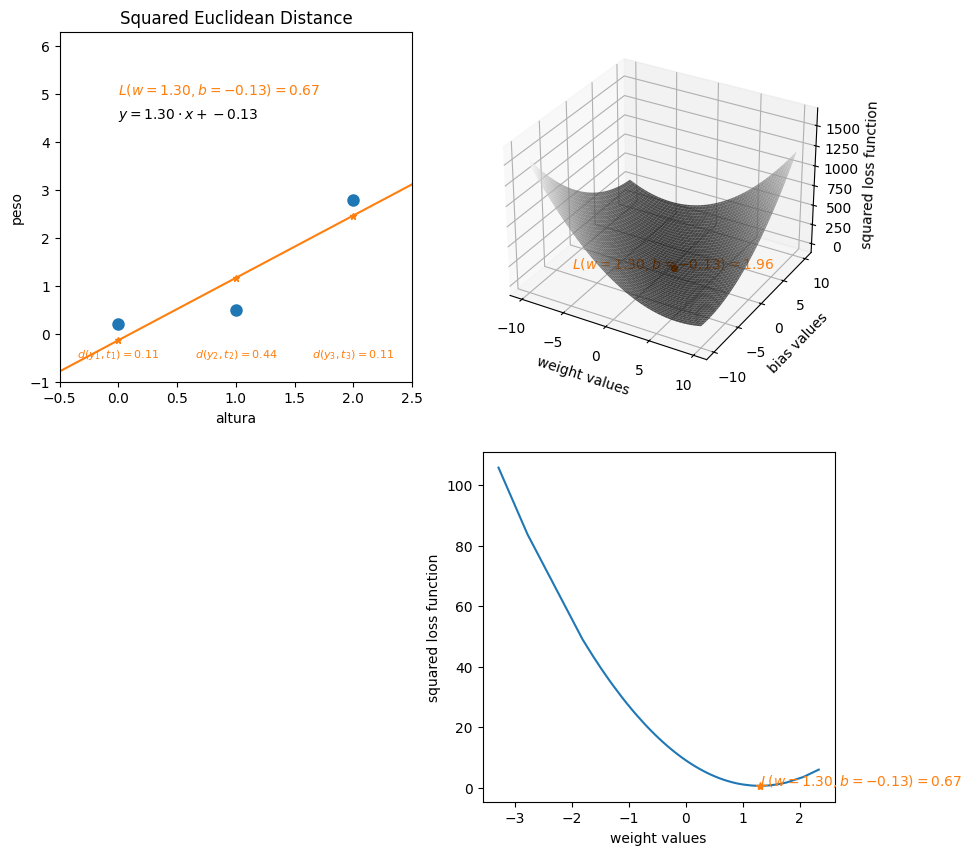

In [10]:
## optimal parameters
N = x_data.shape[0]

mu_x = 1/N * np.sum(x_data)
mu_t = 1/N * np.sum(t_data)

cov_xt = 1/N * np.sum( x_data * t_data )  - mu_x*mu_t
var_x = 1/N *np.sum(x_data**2) - mu_x**2

w_opt = np.reshape( cov_xt / var_x , (1,1))
b_opt = mu_t - w_opt*mu_x

## get_predictions and function
y_range_opt = computation_graph_linear(x_range,w_opt,b_opt)
y_pred_opt = computation_graph_linear(x_data,w_opt,b_opt)

## get loss
squared_loss_opt = squared_loss_function(t_data, y_pred_opt)

## get loss funciton on all domain
w_mesh, b_mesh = np.meshgrid(np.linspace(-10,10,100),np.linspace(-10,10,100))

# reshape x_data and t_data for computations
x_data_expanded = x_data[:,np.newaxis]
t_data_expanded = t_data[:,np.newaxis]

# compute linear projection at all pairs of points
y_pred_expanded = w_mesh*x_data_expanded + b_mesh

# compute loss
expected_squared_loss_mesh = np.sum(squared_loss_function(t_data_expanded, y_pred_expanded), axis = 0)


## Compute optimal loss fixing  bias

# to save individual losses, expected losses and parameters used
expected_squared_loss_acc = []

w_range = []
# Compute the loss funciton over 100 possible neural net.
for i in range(100):
    
    # domain over where we want to plot the function implemented by the NNet
    x_range = np.linspace(-1,4, N_points_domain).reshape((N_points_domain,1))

    # initialize one of our networks
    w, b = create_computation_graph_linear(n_in,n_out)

    # projection from input x to output y through computational graph
    y_range = computation_graph_linear(x_range,w, b_opt)

    # check how this computational_graph predicts at the inputs denote by our observed data X.
    y_pred = computation_graph_linear(x_data,w, b_opt)

    # compute the two losses at the predictions
    squared_loss = squared_loss_function(t_data, y_pred)

    # compute expected loss per parameter 
    expected_squared_loss_acc.append(np.sum(squared_loss))
    
    ## append for plotting
    w_range.append(np.squeeze(w))


# sort loss and weights to interactive plot later
idx = np.argsort(w_range)
sorted_expected_squared_loss_acc = np.array(expected_squared_loss_acc)[idx]

## for plotting
w_opt = np.squeeze(w_opt)
b_opt = np.squeeze(b_opt)

## Plot optimal linear approximation and associated loss
fig = plt.figure(figsize = (10,10))
ax11 = fig.add_subplot(221)
ax12 = fig.add_subplot(222, projection='3d')
ax22 = fig.add_subplot(224)

## display data 
ax11.plot(x_data,t_data,'o', markersize = 8, label = 'data observations')

## Plot optimal funciton function
ax11.plot(x_data, y_pred_opt,'*', markersize = 5, color = f"C1", label = 'Predictions at training input data')
ax11.plot(x_range,y_range_opt, color = f"C1", label = 'function on all the domain' )

## set plot lims
ax11.set_xlabel('altura')
ax11.set_ylabel('peso')
ax11.set_title('Squared Euclidean Distance')
ax11.set_ylim([-1,6.3])
ax11.set_xlim([-0.5,2.5])

## Plot individual losses
for j in range(len(x_data)):
    ax11.text(x_data[j], -0.5, f"$d(y_{j+1},t_{j+1})={float(squared_loss_opt[j]):.2}$", fontsize=8, ha="center", color = f"C1") 

ax11.text(0,5, f"$L(w = {w_opt:.2f},b = {b_opt:.2f})= {float(np.sum(squared_loss_opt)):.2f}$", color = f"C1")  
ax11.text(0,4.5, f"$y = {w_opt:.2f} \cdot x + {b_opt:.2f}$", color = f"k")  


## display loss functions
ax12.plot_surface(w_mesh, b_mesh, expected_squared_loss_mesh, cmap = 'gray', alpha = 0.75 )
ax12.set_xlabel('weight values')
ax12.set_ylabel('bias values')
ax12.set_zlabel('squared loss function')

## Plot the loss in the loss function view
ax12.scatter(w_opt, b_opt, expected_squared_loss_acc[i], color = f"C1")
ax12.text(w_opt, b_opt,expected_squared_loss_acc[i]+2.5, f"$L(w = {w_opt:.2f},b = {b_opt:.2f}) = {float(np.sum(squared_loss)):.2f}$", color = f"C1", zorder = 2, ha = 'center')    


## display loss functions fixing to optimal bias
ax22.plot(np.array(w_range)[idx], sorted_expected_squared_loss_acc )

ax22.plot(w_opt, float(np.sum(squared_loss_opt)), '*', color = f"C1")
ax22.text(w_opt,float(np.sum(squared_loss_opt)), f"$L(w = {w_opt:.2f},b = {b_opt:.2f}) = {float(np.sum(squared_loss_opt)):.2f}$", color = f"C1")    

ax22.set_xlabel('weight values')
ax22.set_ylabel('squared loss function')

As expected the math matches the result. By the way, there are much simpler ways to arrive to these mathematical results. Why I have not choose to place them here? Well basically because I have derived this myself and I decided to go this way. However, after checking if my result was correct there is a much simpler way to arrive at this result, by solving the system of equations in a different way. 

First of all when solving $\frac{\partial L(w,b)}{\partial b} = 0$ instead of solving for $w$, as I did, solve for $b$. The resulting expression is much simpler to modify using the tricks I showed to arrive at: $b = \mu_t -w\mu_x$.

Second, when solving  $\frac{\partial L(w,b)}{\partial w} = 0$, you need to replace the value of $b$ obtained in the step before so instead of substituing $w$ as I did, substitute $b$.


## TODO

* me falta comentar el tema de que escalar la funcion de coste no sirve para nada.
* mostrar que para N=1 hay infinitas soluciones.
* me falta regresion lineal multivariada.
* todas estas regresiones vistas desde el punto de vista de la diferenciación automática.